In [46]:
import os
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from datetime import datetime
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bornavahabzadeh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [48]:
# Read your api key environment variable
#news_api_key = os.getenv("65c3aaba452e46deb1431b4de40ad3e9")
newsapi = NewsApiClient(api_key='~~~~~~~~~~~~~~~')

In [49]:
# Create a newsapi client
#newsapi = NewsApiClient(api_key=news_api_key)

In [50]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en", sort_by = "relevancy")

In [51]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en", sort_by = "relevancy")

In [52]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
    except AttributeError:
        pass

#creating bitcoin dataframe with pandas
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reordering DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,Compound,Negative,Neutral,Positive,Text
0,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
1,-0.6486,0.139,0.817,0.044,"Since its inception in 2009, Bitcoin has made ..."
2,-0.7845,0.154,0.846,0.000,New allegations against a bitcoin developer sp...
3,-0.4767,0.069,0.931,0.000,Say it with me: Bitcoin is not anonymous. \r\n...
4,0.0258,0.080,0.859,0.061,Federal authorities in the U.S. have unsealed ...


In [53]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame using pandas
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
columns =["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_df = ethereum_df[columns]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.4404,0.0,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
1,0.3818,0.0,0.933,0.067,IKEA Iceland has used Ethereum ETHtechnology t...
2,0.6249,0.0,0.900,0.100,Disrupt Berlin is right around the corner. And...
3,0.2263,0.0,0.960,0.040,At least that's the idea. While it's not as in...
4,0.4601,0.0,0.915,0.085,"he plaBy now, you should almost certainly know..."


In [54]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.312675,0.024200,0.910650,0.065150
std,0.439946,0.048259,0.037119,0.030386
min,-0.784500,0.000000,0.817000,0.000000
25%,0.274900,0.000000,0.885250,0.060500
50%,0.507000,0.000000,0.931000,0.068000
75%,0.507000,0.010500,0.932000,0.069000
max,0.687900,0.154000,0.960000,0.117000


In [55]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.121250,0.036500,0.906300,0.057150
std,0.402130,0.054236,0.069055,0.040595
min,-0.823200,0.000000,0.735000,0.000000
25%,0.000000,0.000000,0.885000,0.030750
50%,0.202100,0.000000,0.921500,0.059000
75%,0.411525,0.064500,0.941000,0.075250
max,0.624900,0.210000,1.000000,0.139000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin

Q: Which coin had the highest compound score?

A: bitcoin

Q. Which coin had the highest positive score?

A: ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [57]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [58]:
# Expand the default stop words list if necessary

In [60]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)

    # Convert the words to lowercase
    text = [word.lower() for word in text]
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    # Remove the stop words
    sw = set(stopwords.words('english'))
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text


In [61]:
# Create a new tokens column for bitcoin
bitcoin_tokens = []
[bitcoin_tokens.append(tokenizer(text)) for text in bitcoin_df.Text]   
bitcoin_df['Tokens'] = bitcoin_tokens
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[least, idea, , intensive, mining, bitcoin, , ..."
1,-0.6486,0.139,0.817,0.044,"Since its inception in 2009, Bitcoin has made ...","[since, inception, , , bitcoin, ha, made, ruin..."
2,-0.7845,0.154,0.846,0.000,New allegations against a bitcoin developer sp...,"[new, allegation, bitcoin, developer, spurred,..."
3,-0.4767,0.069,0.931,0.000,Say it with me: Bitcoin is not anonymous. \r\n...,"[say, , bitcoin, anonymous, , three, hundred, ..."
4,0.0258,0.080,0.859,0.061,Federal authorities in the U.S. have unsealed ...,"[federal, authority, u, unsealed, charge, sout..."


In [62]:
# Create a new tokens column for ethereum
ethereum_tokens = []
[ethereum_tokens.append(tokenizer(text)) for text in ethereum_df.Text]   
ethereum_df['Tokens'] = ethereum_tokens
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.4404,0.0,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tl, , dr, , indepth, complete, blockchain, et..."
1,0.3818,0.0,0.933,0.067,IKEA Iceland has used Ethereum ETHtechnology t...,"[ikea, iceland, ha, used, ethereum, ethtechnol..."
2,0.6249,0.0,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, , ple..."
3,0.2263,0.0,0.960,0.040,At least that's the idea. While it's not as in...,"[least, idea, , intensive, mining, bitcoin, , ..."
4,0.4601,0.0,0.915,0.085,"he plaBy now, you should almost certainly know...","[plaby, , almost, certainly, know, ethereum, ,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [63]:
from collections import Counter
from nltk import ngrams

In [64]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in bitcoin_df.Tokens]
dict(bitcoin_bigram_counts[0].most_common(10))

{('least', 'idea'): 1,
 ('idea', ''): 1,
 ('', 'intensive'): 1,
 ('intensive', 'mining'): 1,
 ('mining', 'bitcoin'): 1,
 ('bitcoin', ''): 1,
 ('', 'running'): 1,
 ('running', 'full'): 1,
 ('full', 'node'): 1,
 ('node', 'still'): 1}

In [65]:
# Generate the Ethereum N-grams where N=2
ethereum_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in ethereum_df.Tokens]
dict(ethereum_bigram_counts[0].most_common(10))

{('', ''): 2,
 ('', 'come'): 2,
 ('tl', ''): 1,
 ('', 'dr'): 1,
 ('dr', ''): 1,
 ('', 'indepth'): 1,
 ('indepth', 'complete'): 1,
 ('complete', 'blockchain'): 1,
 ('blockchain', 'ethereum'): 1,
 ('ethereum', 'programmer'): 1}

In [66]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [67]:
# Get the top 10 words for Bitcoin
bitcoin_token_list = []
for tokens in bitcoin_df.Tokens:
    bitcoin_token_list += tokens
top_10_bitcoin_words = token_count(bitcoin_token_list)
top_10_bitcoin_words

[('', 196),
 ('bitcoin', 50),
 ('satoshi', 29),
 ('nakaboto', 28),
 ('char', 20),
 ('say', 15),
 ('welcome', 15),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14)]

In [68]:
# Get the top 10 words for Ethereum
ethereum_token_list = []
for tokens in ethereum_df.Tokens:
    ethereum_token_list += tokens
top_10_ethereum_words = token_count(ethereum_token_list)
top_10_ethereum_words

[('', 194),
 ('char', 20),
 ('ethereum', 7),
 ('cryptocurrency', 7),
 ('blockchain', 5),
 ('bitcoin', 5),
 ('ha', 4),
 ('facebook', 4),
 ('libra', 4),
 ('security', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

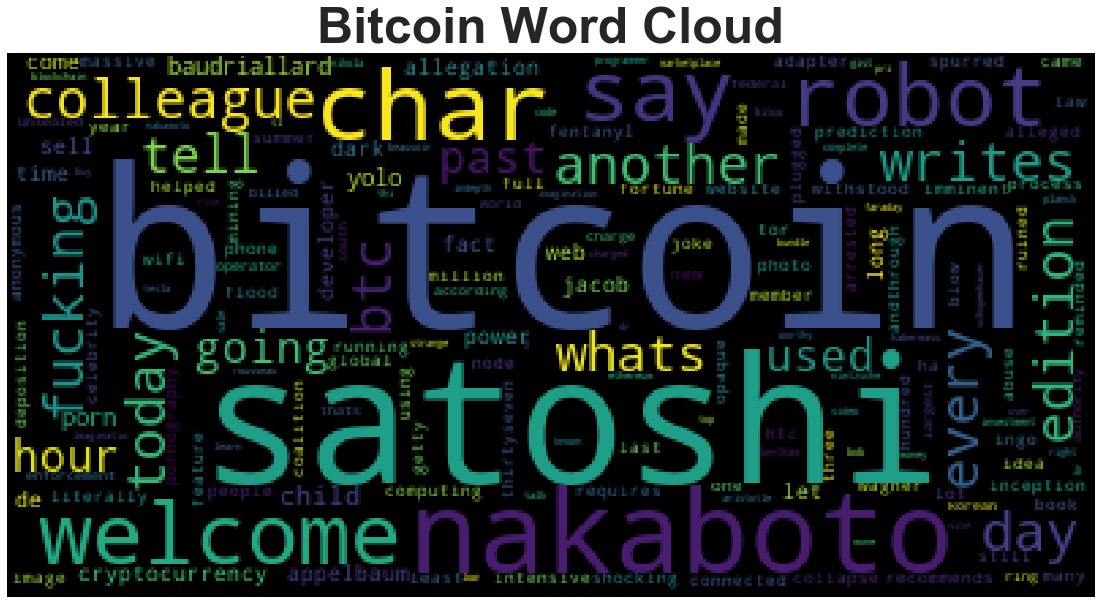

In [70]:
# Generate the Bitcoin word cloud
bitcoin_corpus = ''
sw = set(stopwords.words('english'))
for token in bitcoin_df.Text:
    bitcoin_corpus += token
long_string = " ".join(str(x) for x in tokenizer(bitcoin_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

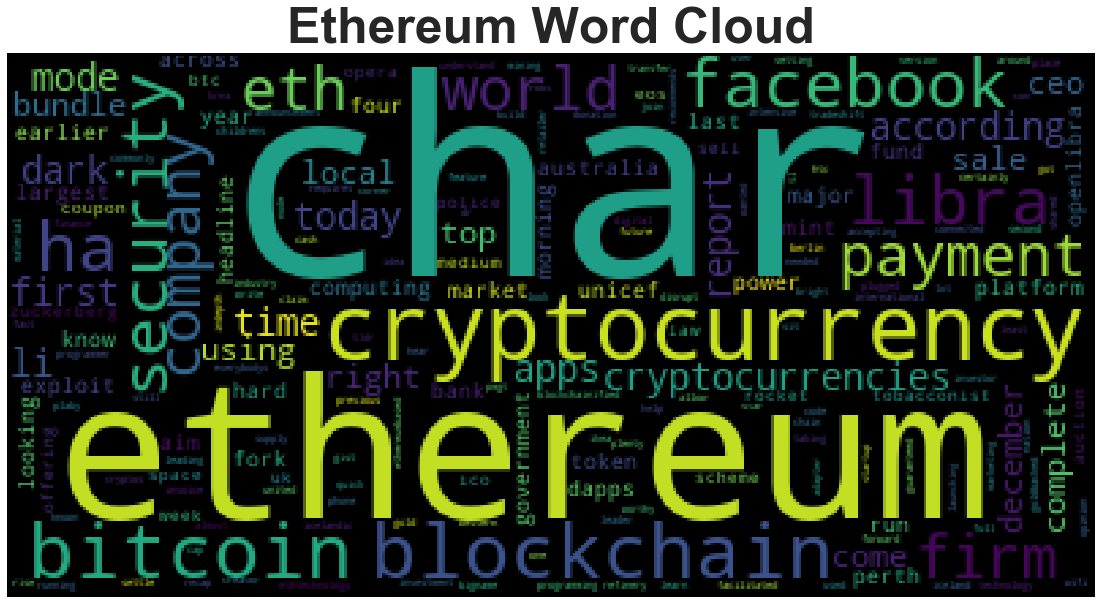

In [71]:
# Generate the Ethereum word cloud
ethereum_corpus = ''
sw = set(stopwords.words('english'))
for token in ethereum_df.Text:
    ethereum_corpus += token
long_string = " ".join(str(x) for x in tokenizer(ethereum_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [72]:
import spacy
from spacy import displacy

In [73]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [74]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [75]:
# Concatenate all of the bitcoin text together
bitcoin_corpus

"At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars]Since its inception in 2009, Bitcoin has made and ruined fortunes, helped sell fentanyl and books about cryptocurrency, withstood literally millions of jokes and just as many predictions of imminent collapse, andthrough a process opaque to most people, myself… [+10529 chars]New allegations against a bitcoin developer spurred a deposition from Jacob Appelbaum\r\nPhoto by Ingo Wagner / Getty Images\r\nIn the summer of 2016, a flood of abuse allegations came out against celebrity Tor developer Jacob Appelbaum, a shocking blow to one of… [+6852 chars]Say it with me: Bitcoin is not anonymous.\xa0\r\nThree hundred and thirty-seven alleged members of a massive dark web child pornography website were reminded of that fact l

In [76]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_corpus)
# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"


In [77]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [78]:
# List all Entities
bitcoin_entities = set([ent.text for ent in bitcoin_ner.ents ])
bitcoin_entities

{'+10529 chars]New allegations',
 '+2872',
 '+2975 chars]Our',
 '+2981',
 '+3352 chars]Our',
 '2009',
 'Aristotle',
 'Baudriallard',
 'Bentham',
 'Bitco',
 'Bitcoin',
 'Bitcoin BTC',
 'Bitcoin Pri',
 'Complete Blockchain and Ethereum Programmer',
 'Faraday',
 'HTC',
 'Ingo Wagner / Getty Images',
 'Jacob Appelbaum',
 'Nietzsche',
 'Nikola Tesla',
 'Planck',
 'Rousseau',
 'Satoshi Nakaboto',
 'Satoshi Nakamoto',
 'Schopenhauer',
 'South Korean',
 'Three hundred and thirty-seven',
 'Time',
 'Today',
 'Tor',
 'U.S.',
 'Video',
 'Welcome',
 'Yolo',
 'de Beauvoir',
 'just $24',
 'last year',
 'millions',
 'the past 24 hours',
 'the summer of 2016'}

---

## Ethereum NER

In [79]:
# Concatenate all of the ethereum text together
ethereum_corpus

'TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it\'s a worthy investment, and it when it comes to top… [+1491 chars]IKEA Iceland has used Ethereum ETHtechnology to settle an invoice with a local retailer, accepting payment\xa0in blockchainified\xa0digital cash.\r\nSupply chain payments firm Tradeshift facilitated the transfer using an Ethereum-based version of the Icelandic\xa0króna … [+1062 chars]Disrupt Berlin is right around the corner. And there is plenty to look forward to.\r\nJoin us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as A… [+14834 chars]At least that\'s the idea. While it\'s not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends 

In [80]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_corpus)
# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [81]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [82]:
# List all Entities
ethereum_entities = ([ent.text for ent in ethereum_ner.ents ])
set(ethereum_entities)

{'$24 million',
 '1',
 '148',
 '2',
 '2021',
 '30',
 '300,000',
 '369,000',
 '5,200',
 'Bejing',
 'Berlin',
 'Bitcoin',
 'Bitcoin BTC',
 'Block.one',
 'Bloomberg',
 'Chinese',
 'Complete Blockchain and Ethereum Programmer',
 'Dai\xa0',
 'December 11 and December 12',
 'Devcon 5',
 'ETH',
 'Ethereum',
 'Ethereum ETH',
 'Ethereum ETHtechnology',
 "Ethereum Foundation's",
 'Everybodys',
 'Facebook',
 'Friday',
 'Geneva',
 'HTC',
 'Hard Fork',
 'ICO',
 'Iceland',
 'Icelandic',
 'Japan',
 'June',
 'Libra',
 "Mark Zuckerberg's",
 'Mastercard',
 'Mercado Pagowithdrew',
 'Moonday',
 'Mornings',
 'OpenLibra',
 'Opera',
 'Opera Mobile',
 'Osaka',
 'Perth Mint',
 'Petro',
 'Q3 of this year',
 'Septem',
 'The Complete Blockchain and Ethereum Programming Bundle',
 'Tradeshift',
 'UK',
 'UNICEF',
 'US',
 'Ukrainian',
 'Venezuela',
 'Visa',
 'Wednesday',
 'Western Australia',
 'Zuckerberg',
 'as much as 9%',
 'earlier this year',
 'first',
 'four',
 'just $2.03 billion',
 'just $24',
 'last quarter',